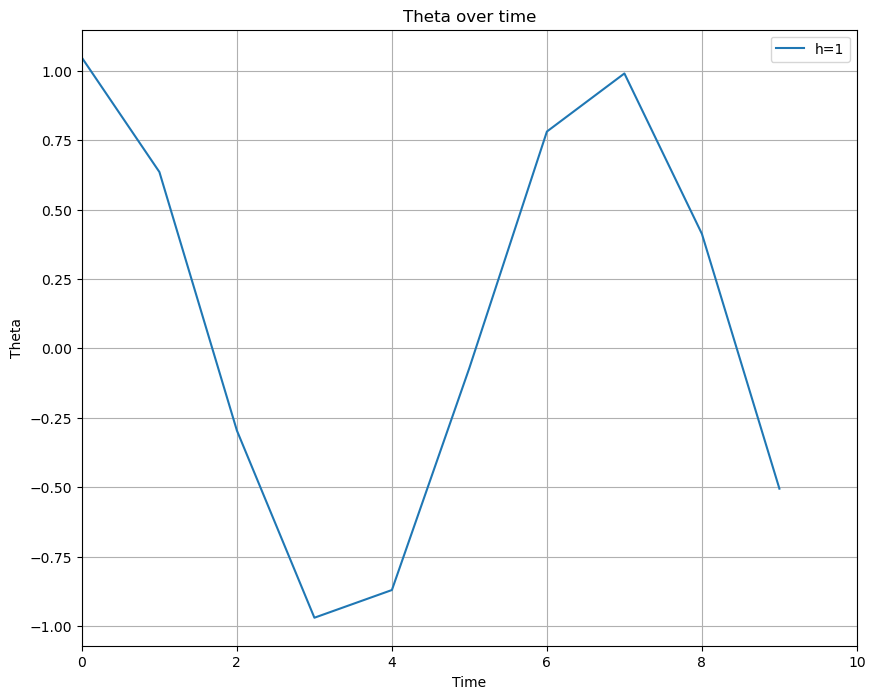

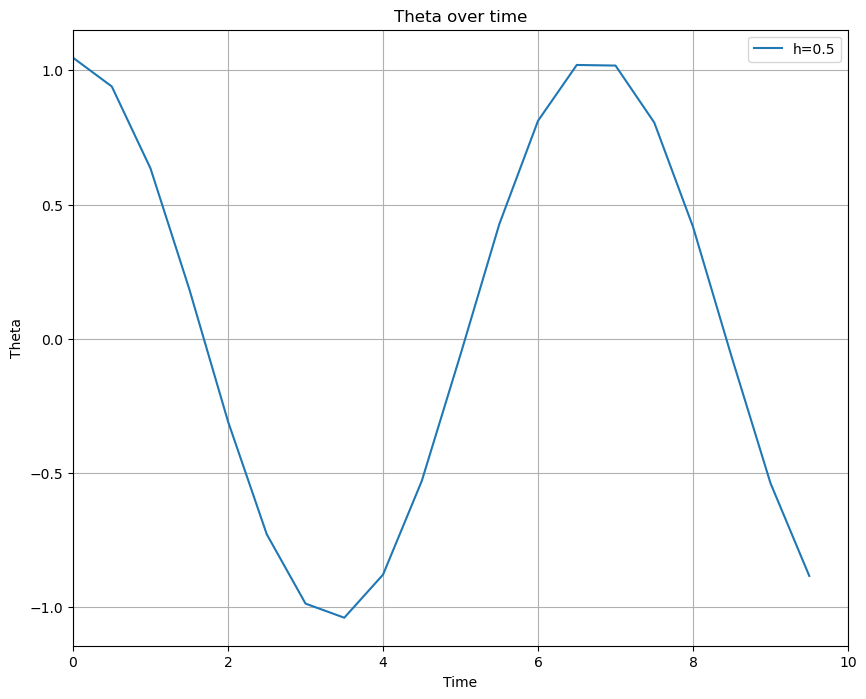

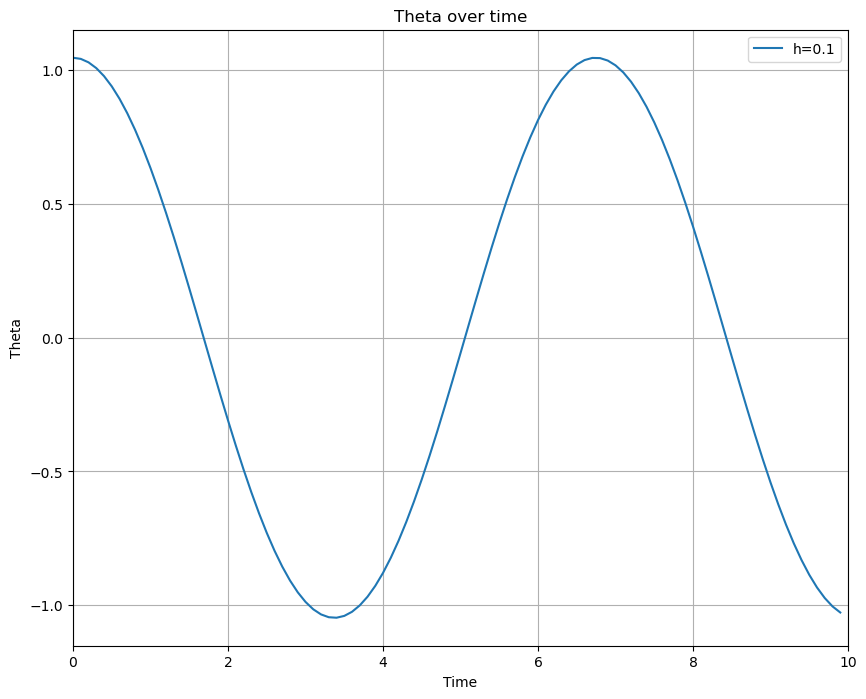

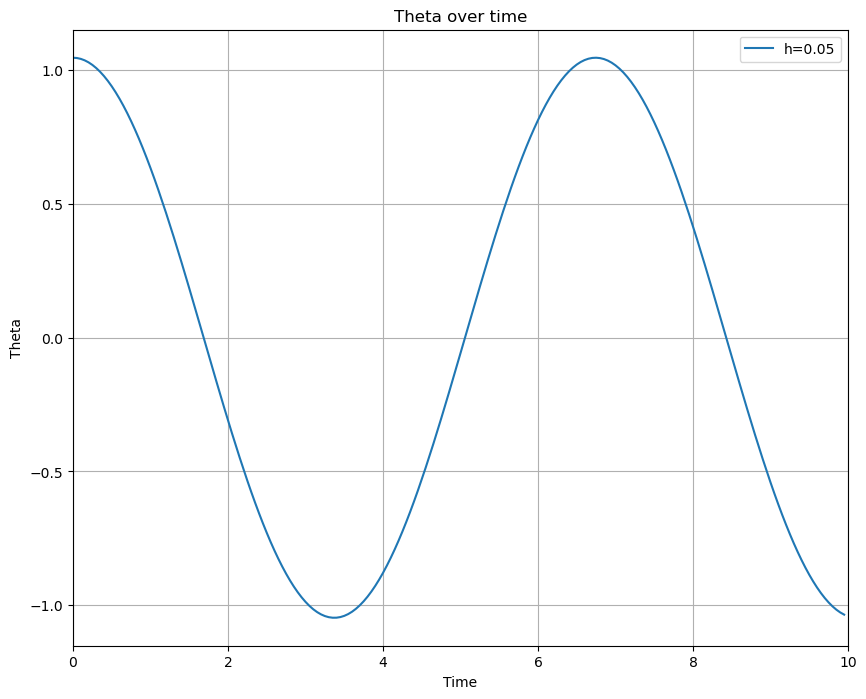

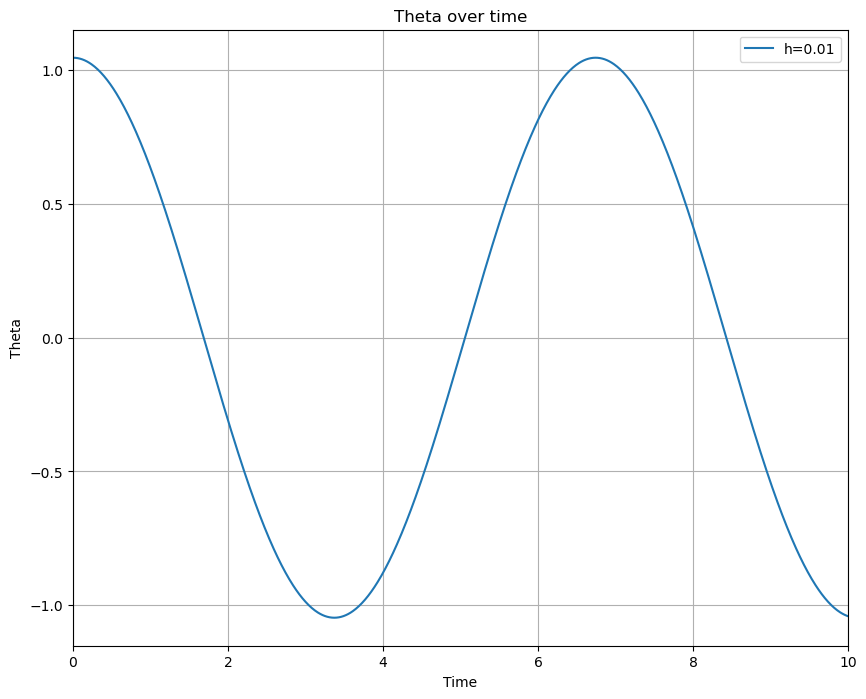

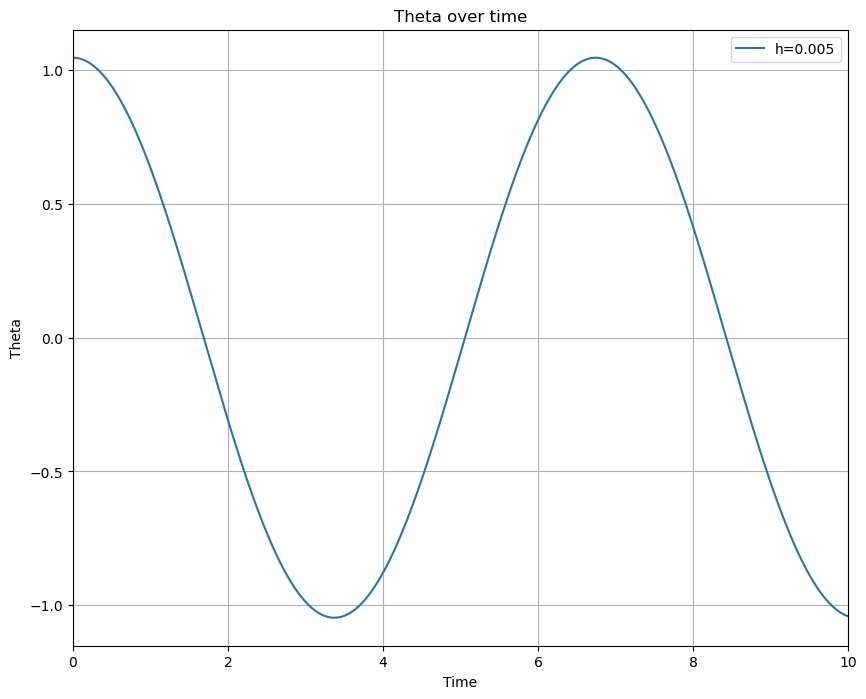

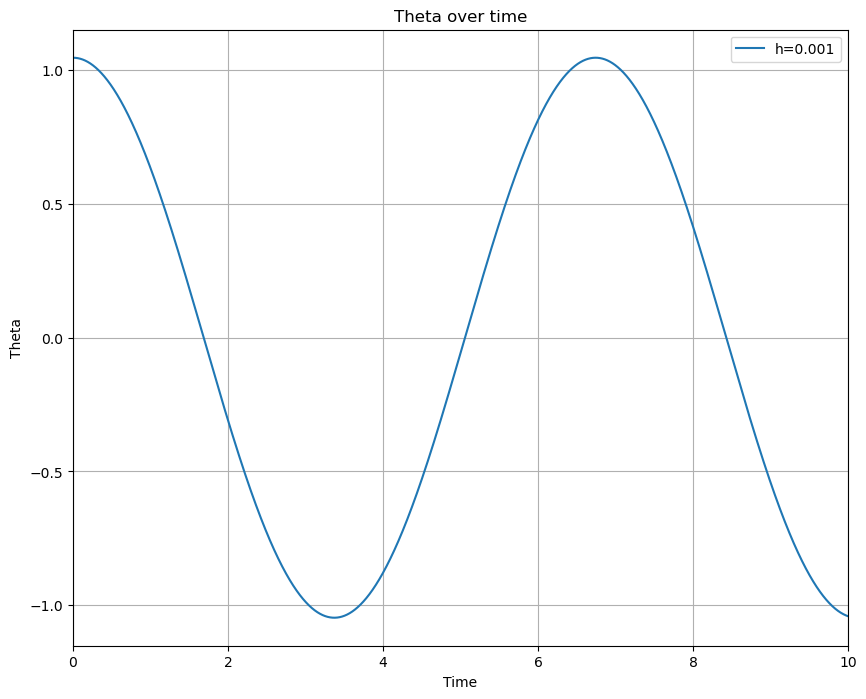

In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np

theta0 = math.pi/3 # initial angle condition
w0 = 0.0 # initial angular velocity
g = 1 # for simplicity
l = 1 # for simplicity
t0 = 0 # initial time
T = 10 # final time
hs = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001] # different step sizes
y0 = [theta0, w0] # store initial angle and velocity info into y0

for h in hs:
    
    t = np.arange(t0, T, h)
    
    y = [y0]
    for i in range(1, len(t)):
        y_old = y[-1]

        # Runge-Kutta 4th
        k1_y = y_old[1]
        k1_w = -g/l * math.sin(y_old[0])
        k2_y = y_old[1] + h*k1_w/2
        k2_w = -g/l * math.sin(y_old[0] + h*k1_y/2)
        k3_y = y_old[1] + h*k2_w/2
        k3_w = -g/l * math.sin(y_old[0] + h*k2_y/2)
        k4_y = y_old[1] + h*k3_w
        k4_w = -g/l * math.sin(y_old[0] + h*k3_y)

        y_new = y_old[0] + h*(k1_y + 2*k2_y + 2*k3_y + k4_y)/6
        w_new = y_old[1] + h*(k1_w + 2*k2_w + 2*k3_w + k4_w)/6

        y.append([y_new, w_new])

    theta = [theta_w[0] for theta_w in y]
    
    # plot theta(t)
    plt.figure(figsize=(10, 8))
    plt.plot(t, theta, label='h={}'.format(h))
    plt.xlabel('Time')
    plt.ylabel('Theta')
    plt.xlim(0,10)
    plt.title('Theta over time')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# h=0.01 or h=0.05 are good values for step size